In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,075
Trainable params: 1,075
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 8/10 [=======================>......] - ETA: 0s - loss: 1.1266 - accuracy: 0.3213 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 3s 48ms/step - loss: 1.1246 - accuracy: 0.3328 - val_loss: 1.0814 - val_accuracy: 0.6718
Epoch 2/1000
 7/10 [====================>.........] - ETA: 0s - loss: 1.0927 - accuracy: 0.5379
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 192ms/step - loss: 1.0882 - accuracy: 0.5407 - val_loss: 1.0597 - val_accuracy: 0.6768
Epoch 3/1000
 7/10 [====================>.........] - ETA: 0s - loss: 1.0689 - accuracy: 0.6027
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 19ms/step - loss: 1.0650 - accuracy: 0.6061 - val_loss: 1.0375 - val_accuracy: 0.6692
Epoch 4/1000
 6/10 [=================>............] - ETA: 0s 

 7/10 [====================>.........] - ETA: 0s - loss: 0.6073 - accuracy: 0.6786
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 0.6005 - accuracy: 0.6893 - val_loss: 0.5754 - val_accuracy: 0.6947
Epoch 28/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.6234 - accuracy: 0.6654
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 0.6060 - accuracy: 0.6885 - val_loss: 0.5731 - val_accuracy: 0.7048
Epoch 29/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.6058 - accuracy: 0.6823
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 0.5951 - accuracy: 0.6935 - val_loss: 0.5706 - val_accuracy: 0.7099
Epoch 30/1000
 6/10 [=================>............] - ETA: 0s - loss: 0

 6/10 [=================>............] - ETA: 0s - loss: 0.5476 - accuracy: 0.7122
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.5358 - accuracy: 0.7224 - val_loss: 0.5078 - val_accuracy: 0.7252
Epoch 54/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7176
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 193ms/step - loss: 0.5452 - accuracy: 0.7250 - val_loss: 0.5034 - val_accuracy: 0.7252
Epoch 55/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7354
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.5370 - accuracy: 0.7309 - val_loss: 0.5006 - val_accuracy: 0.7201
Epoch 56/1000
 8/10 [=======================>......] - ETA: 0s - loss: 

 6/10 [=================>............] - ETA: 0s - loss: 0.4678 - accuracy: 0.7812
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 25ms/step - loss: 0.4876 - accuracy: 0.7708 - val_loss: 0.4192 - val_accuracy: 0.8117
Epoch 80/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.4856 - accuracy: 0.7656
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 0.4829 - accuracy: 0.7691 - val_loss: 0.4157 - val_accuracy: 0.8117
Epoch 81/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.4988 - accuracy: 0.7589
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 0.5051 - accuracy: 0.7572 - val_loss: 0.4124 - val_accuracy: 0.8193
Epoch 82/1000
10/10 [==============================] - ETA: 0s - loss: 0

 7/10 [====================>.........] - ETA: 0s - loss: 0.4401 - accuracy: 0.8047
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 0.4420 - accuracy: 0.8005 - val_loss: 0.3398 - val_accuracy: 0.8804
Epoch 106/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.4309 - accuracy: 0.8103
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 0.4263 - accuracy: 0.8124 - val_loss: 0.3361 - val_accuracy: 0.8931
Epoch 107/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.4217 - accuracy: 0.8164
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.4187 - accuracy: 0.8158 - val_loss: 0.3303 - val_accuracy: 0.8957
Epoch 108/1000
 6/10 [=================>............] - ETA: 0s - l

Epoch 131/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.3888 - accuracy: 0.8348
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.3826 - accuracy: 0.8396 - val_loss: 0.2718 - val_accuracy: 0.9237
Epoch 132/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3950 - accuracy: 0.8301
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 193ms/step - loss: 0.3946 - accuracy: 0.8302 - val_loss: 0.2711 - val_accuracy: 0.9211
Epoch 133/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.3687 - accuracy: 0.8490
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.3803 - accuracy: 0.8413 - val_loss: 0.2697 - val_accuracy: 0.9211
Epoch 134/1000
 6/10 [=================>...........

Epoch 157/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.3493 - accuracy: 0.8607
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.3525 - accuracy: 0.8574 - val_loss: 0.2293 - val_accuracy: 0.9338
Epoch 158/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.3661 - accuracy: 0.8411
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 24ms/step - loss: 0.3655 - accuracy: 0.8404 - val_loss: 0.2286 - val_accuracy: 0.9288
Epoch 159/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.3661 - accuracy: 0.8438
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 191ms/step - loss: 0.3735 - accuracy: 0.8421 - val_loss: 0.2301 - val_accuracy: 0.9288
Epoch 160/1000
 7/10 [====================>........

Epoch 183/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3329 - accuracy: 0.8564
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.3273 - accuracy: 0.8599 - val_loss: 0.1966 - val_accuracy: 0.9440
Epoch 184/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.3464 - accuracy: 0.8504
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 0.3364 - accuracy: 0.8599 - val_loss: 0.1970 - val_accuracy: 0.9364
Epoch 185/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.3508 - accuracy: 0.8542
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.3376 - accuracy: 0.8616 - val_loss: 0.1975 - val_accuracy: 0.9364
Epoch 186/1000
 8/10 [=======================>......

Epoch 209/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.3074 - accuracy: 0.8717
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.3195 - accuracy: 0.8616 - val_loss: 0.1763 - val_accuracy: 0.9542
Epoch 210/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3457 - accuracy: 0.8506
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 0.3413 - accuracy: 0.8548 - val_loss: 0.1801 - val_accuracy: 0.9542
Epoch 211/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.3141 - accuracy: 0.8683
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 190ms/step - loss: 0.3132 - accuracy: 0.8701 - val_loss: 0.1847 - val_accuracy: 0.9491
Epoch 212/1000
 7/10 [====================>........

Epoch 235/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3263 - accuracy: 0.8574
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 0.3186 - accuracy: 0.8633 - val_loss: 0.1663 - val_accuracy: 0.9567
Epoch 236/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3044 - accuracy: 0.8662
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 0.3012 - accuracy: 0.8693 - val_loss: 0.1688 - val_accuracy: 0.9517
Epoch 237/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3083 - accuracy: 0.8750
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 2s 190ms/step - loss: 0.3137 - accuracy: 0.8727 - val_loss: 0.1680 - val_accuracy: 0.9517
Epoch 238/1000
 7/10 [====================>........

Epoch 261/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.2952 - accuracy: 0.8809
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 0.2888 - accuracy: 0.8871 - val_loss: 0.1551 - val_accuracy: 0.9542
Epoch 262/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.3080 - accuracy: 0.8817
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.2937 - accuracy: 0.8879 - val_loss: 0.1529 - val_accuracy: 0.9542
Epoch 263/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.2705 - accuracy: 0.8877
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.2765 - accuracy: 0.8879 - val_loss: 0.1515 - val_accuracy: 0.9517
Epoch 264/1000
 7/10 [====================>.........

Epoch 287/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.3004 - accuracy: 0.8672
Epoch 287: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.2968 - accuracy: 0.8701 - val_loss: 0.1457 - val_accuracy: 0.9618
Epoch 288/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.2831 - accuracy: 0.8809
Epoch 288: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 20ms/step - loss: 0.2876 - accuracy: 0.8735 - val_loss: 0.1519 - val_accuracy: 0.9567
Epoch 289/1000
 8/10 [=======================>......] - ETA: 0s - loss: 0.2714 - accuracy: 0.8945
Epoch 289: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.2728 - accuracy: 0.8930 - val_loss: 0.1554 - val_accuracy: 0.9542
Epoch 290/1000
 8/10 [=======================>......

Epoch 313/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.2697 - accuracy: 0.8895
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 21ms/step - loss: 0.2744 - accuracy: 0.8854 - val_loss: 0.1380 - val_accuracy: 0.9593
Epoch 314/1000
 6/10 [=================>............] - ETA: 0s - loss: 0.2662 - accuracy: 0.8815
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 0.2907 - accuracy: 0.8684 - val_loss: 0.1398 - val_accuracy: 0.9618
Epoch 315/1000
 7/10 [====================>.........] - ETA: 0s - loss: 0.2650 - accuracy: 0.8895
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
10/10 [==============================] - 0s 22ms/step - loss: 0.2836 - accuracy: 0.8812 - val_loss: 0.1408 - val_accuracy: 0.9593
Epoch 316/1000
 7/10 [====================>.........

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.7929960e-02 9.6206343e-01 6.6782018e-06]
1


# 混同行列

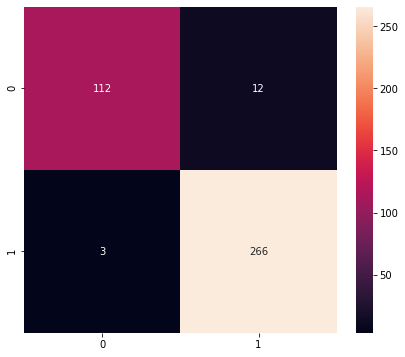

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       124
           1       0.96      0.99      0.97       269

    accuracy                           0.96       393
   macro avg       0.97      0.95      0.95       393
weighted avg       0.96      0.96      0.96       393



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Bhargav\AppData\Local\Temp\tmp759a18_q\assets


6256

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.7929952e-02 9.6206343e-01 6.6781954e-06]
1
